# Introduction to the pycroscopy ecosystem
### By R. Vasudevan

Here we will play with some input/output and visualization routines within the pycroscopy ecosystem. We will cover

1.   Creating a sidpy dataset and visualizing it
2.   Loading a sidpy dataset from an SPM image
3.   Performing some analysis on it using pycroscopy
4.   Some suggested notebooks to try next (BGlib, AtomAI, GPim, pyTEMLib)


Note that interactive plotting is disabled in colab notebooks so it would be preferable to run this notebook locally.



# 1. Creating, Visualizing, Saving and Restoring Datasets
By  **Gerd Duscher and Suhas Somnath**

In [1]:
# we will need the sidpy package and pyNSID and SciFIreaders
!pip install sidpy 
#git+https://github.com/pycroscopy/sidpy.git
!pip install pyNSID SciFiReaders pycroscopy==0.61.0a0

#MAKE SURE TO RESTART AFTER RUNNING THIS CELL!

     |████████████████████████████████| 87 kB 2.4 MB/s 
     |████████████████████████████████| 1.6 MB 35.5 MB/s 
     |████████████████████████████████| 788 kB 64.5 MB/s 
     |████████████████████████████████| 786 kB 40.2 MB/s 
     |████████████████████████████████| 1.0 MB 39.8 MB/s 
     |████████████████████████████████| 125 kB 45.7 MB/s 
     |████████████████████████████████| 370 kB 68.1 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 1.3.0
    Uninstalling cloudpickle-1.3.0:
      Successfully uninstalled cloudpickle-1.3.0
  Attempting uninstall: dask
    Found existing installation: dask 2.12.0
    Uni

     |████████████████████████████████| 160 kB 7.9 MB/s 
     |████████████████████████████████| 66 kB 5.3 MB/s 
     |████████████████████████████████| 154 kB 56.9 MB/s 
     |████████████████████████████████| 51 kB 240 kB/s 
  Created wheel for igor: filename=igor-0.3-py3-none-any.whl size=52115 sha256=67ade39da1dd868c8cc9cbf7948c0796025fca8fb45d73aa48019570ade02540
  Stored in directory: /root/.cache/pip/wheels/6f/27/d2/31051f074caeea50e0d11890508c40e9456af990a9350d0fb6
Successfully built igor


In [2]:
import numpy as np
import sidpy
import matplotlib.pyplot as plt
import h5py
import pyNSID
print('sidpy version: ', sidpy.__version__)

sidpy version:  0.0.6


## Creating a ``sipy.Dataset`` object
We can create a simple sidpy Dataset from any array like object
Here we just use a numpy array filled with zeros



In [3]:
data_set = sidpy.Dataset.from_array(np.random.random([4, 5, 10]), name='random')

print(data_set)
data_set

sidpy.Dataset of type UNKNOWN with:
 dask.array<array, shape=(4, 5, 10), dtype=float64, chunksize=(4, 5, 10), chunktype=numpy.ndarray>
 data contains: generic (generic)
 and Dimensions: 
a:  generic (generic) of size (4,)
b:  generic (generic) of size (5,)
c:  generic (generic) of size (10,)


sidpy.Dataset of type UNKNOWN with:
 dask.array<array, shape=(4, 5, 10), dtype=float64, chunksize=(4, 5, 10), chunktype=numpy.ndarray>
 data contains: generic (generic)
 and Dimensions: 
a:  generic (generic) of size (4,)
b:  generic (generic) of size (5,)
c:  generic (generic) of size (10,)

Note that ``data_set`` is a dask array....
We will be improving upon the information that will be displayed when printing ``sidpy.Dataset`` objects

Accessing data within a ``Dataset``:
Indexing of the dataset works like in numpy
Note, that we first index and then we make a numpy array for printing reasons


In [4]:
print(np.array(data_set[:,0,2]))

[0.87016468 0.17451495 0.41562721 0.08538813]


Slicing and dicing:



## Metadata
``sidpy`` automatically assigns generic top-level metadata regarding the
``Dataset``. Users are encouraged to capture the context regarding the dataset.
The attributes included in the sidpy dataset are 
Required Attributes:

- ``quantity``: string: Physical quantity that is contained in this dataset

- ``units``: string: Units for this physical quantity

- ``data_type``: string : What kind of data this is. Example - image, image stack, video, hyperspectral image, etc.

- ``modality``: string : Experimental / simulation modality - scientific meaning of data. Example - photograph, TEM micrograph, SPM Force-Distance spectroscopy.

- ``source``: string : Source for dataset like the kind of instrument. One could go very deep here into either the algorithmic details if this is a result from analysis or the exact configurations for the instrument that generated this dataset.

Those attributes are set to ``generic`` originally but one would want to set them
for the specific dataset. The attributes ``data_type``, ``quantity`` and ``units``  will be important for plotting the data.

Here's how one could do that, but with the wrong key word:



In [5]:
data_set.data_type = 'spectral_image'  # supported

data_set.units = 'nA'
data_set.quantity = 'Current'

### Scientific metadata
These ``Dataset`` objects can also capture rich scientific metadata such as
acquisition parameters, etc. as well:
We would want to add those parameters as attributes.
These attributes could be lists, numpy arrays or simple dictionaries.
It is encouraged to add any parameters of data analysis to the datasets,
to keep track of input parameters. Here I made some up as an illustration:

 These ``Dataset`` objects can also capture rich scientific metadata such as acquisition parameters, etc. as well:

We would want to add those parameters as attributes. These attributes could be lists, numpy arrays or simple dictionaries. It is encouraged to add any parameters of data analysis to the datasets, to keep track of input parameters.

It is recommended to add any parameters to the (nested) metadata dictionary.
These metadata can then be viewed in dataset.view_metadata and dataset.view_original_metadata. It is encouraged to add any parameters of data analysis to the datasets, to keep track of input parameters.

There is a size limit of 64kB for the storage of dictionaries in h5py. Therefore, large data such as reference data should be added directly as attributes. All attributes that you add to a dataset will be stored within the pyNSID file. 
 
Please note, that the dictionary ``original_metadata`` should not be changed so that information provided by the acquisition device stays pristine, but relevant inforamtion should be copied over to the ``metadata`` attribute/dictionary.

Here I made up some metadata as an illustration:

In [6]:
data_set.calibration = np.arange(5)
data_set.metadata = {'nothing': ' ', 'value': 6.8, 'instrument': {'microscope': 'Nion', 'acceleration_voltage':60000}}
data_set.metadata['acquired'] = 'nowhere'

print(data_set.calibration)
sidpy.dict_utils.print_nested_dict(data_set.metadata)

[0 1 2 3 4]
nothing :  
value : 6.8
instrument :
	microscope : Nion
	acceleration_voltage : 60000
acquired : nowhere


Another set of metadata in these Datasets is the Dimension ones:



## Dimensions
The ``Dataset`` is automatically populated with generic information about
each dimension of the ``Dataset``. It is a good idea to capture context
regarding each of these dimensions using ``sidpy.Dimension``.
As a minimum we need a name and values (of the same length as the dimensions of the data).
One can provide as much or as little information about each dimension.



In [7]:
data_set.set_dimension(0, sidpy.Dimension(np.arange(data_set.shape[0]), 
                                          name='x', units='um', quantity='Length',
                                          dimension_type='spatial'))
data_set.set_dimension(1, sidpy.Dimension(np.linspace(-2, 2, num=data_set.shape[1], endpoint=True),
                                          'y', units='um', quantity='Length',
                                          dimension_type='spatial'))
data_set.set_dimension(2, sidpy.Dimension(np.sin(np.linspace(0, 2 * np.pi, num=data_set.shape[2])),
                                          'bias' ))

One could also manually add information regarding specific components of
dimensions associated with Datasets via:



In [8]:
data_set.bias.dimension_type = 'spectral'
data_set.bias.units = 'V'
data_set.bias.quantity = 'Bias'

Let's take a look at what the dataset looks like with the additional information
regarding the dimensions. 

We can access a dimension by its name or by the dimension number.

Also the print function now provides a little more information about our dataset.

In [9]:
print(data_set.bias)
print(data_set.dim_1)
print(data_set)
data_set

bias:  Bias (V) of size (10,)
y:  Length (um) of size (5,)
sidpy.Dataset of type SPECTRAL_IMAGE with:
 dask.array<array, shape=(4, 5, 10), dtype=float64, chunksize=(4, 5, 10), chunktype=numpy.ndarray>
 data contains: Current (nA)
 and Dimensions: 
x:  Length (um) of size (4,)
y:  Length (um) of size (5,)
bias:  Bias (V) of size (10,)
 with metadata: ['nothing', 'value', 'instrument', 'acquired']


sidpy.Dataset of type SPECTRAL_IMAGE with:
 dask.array<array, shape=(4, 5, 10), dtype=float64, chunksize=(4, 5, 10), chunktype=numpy.ndarray>
 data contains: Current (nA)
 and Dimensions: 
x:  Length (um) of size (4,)
y:  Length (um) of size (5,)
bias:  Bias (V) of size (10,)
 with metadata: ['nothing', 'value', 'instrument', 'acquired']

## Plotting
The ``Dataset`` object also comes with the ability to visualize its contents
using the ``plot()`` function. Here we only show a simple application, but a more
detailed description can be found in the plotting section.
Here we plot a spectral image you can click in the image part of the plot on the
left and the spectrum on the right will update.



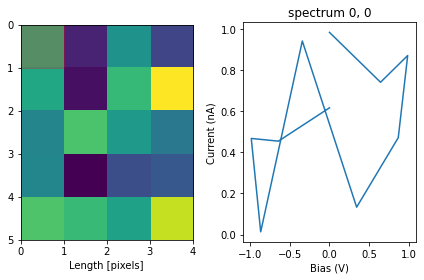

In [10]:
data_set.plot()

The plotting depends on the data_type of the dataset and the dimension_types
of it's dimension datasets. Above, we set the first two dimension_type types to
``spatial`` and the third one to ``spectral``.

The data_type was ``spectral_image``.
So the spatial dimensions are recognized as relevant for an image and the third dimension is recognized as a spectrum, conducive to plotting as shown above.
If we change the data_type to image, the default plotting behavoir is to plot the first slice in the dataset (i.e. data_set[:,:,0]).



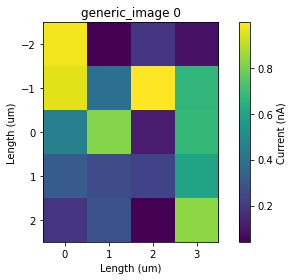

In [11]:
data_set.data_type = 'image'
data_set.plot()

## Saving

These ``Dataset`` objects will be deleted from memory once the python script
completes or when a notebook is closed. The information collected in a
``Dataset`` can reliably be stored to files using functions in sister
packages - ``pyUSID`` and ``pyNSID`` that write the dataset according to the
**Universal Spectroscopy and Imaging Data (USID)** or **N-dimensional
Spectrocsopy and Imaging Data (NSID)** formats.
Here are links to how one could save such Datasets for each package:



In [12]:
hf = h5py.File("test2.hf5", 'a')
meas_grp = hf.create_group('Measurement_000/Channel_000')
pyNSID.hdf_io.write_nsid_dataset(data_set, meas_grp, main_data_name="image");

/usr/local/lib/python3.7/dist-packages/sidpy/hdf/hdf_utils.py:389: UserWarning: Converted key: 0 from type: <class 'int'> to str
  ''.format(key, type(key)))
/usr/local/lib/python3.7/dist-packages/sidpy/hdf/hdf_utils.py:389: UserWarning: Converted key: 1 from type: <class 'int'> to str
  ''.format(key, type(key)))
/usr/local/lib/python3.7/dist-packages/sidpy/hdf/hdf_utils.py:389: UserWarning: Converted key: 2 from type: <class 'int'> to str
  ''.format(key, type(key)))
/usr/local/lib/python3.7/dist-packages/sidpy/hdf/hdf_utils.py:443: UserWarning: Casting attribute value: <sidpy.viz.dataset_viz.ImageVisualizer object at 0x7f9580eba190> of type: <class 'sidpy.viz.dataset_viz.ImageVisualizer'> to str
  ''.format(val, type(val)))
/usr/local/lib/python3.7/dist-packages/pyNSID/io/hdf_utils.py:352: FutureWarning: validate_h5_dimension may be removed in a future version
  FutureWarning)


In [13]:
sidpy.hdf_utils.print_tree(hf)

/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ image
      -----
      ├ __dict__
        --------
        ├ _axes
          -----
        ├ _metadata
          ---------
          ├ instrument
            ----------
        ├ _original_metadata
          ------------------
      ├ _axes
        -----
      ├ _metadata
        ---------
        ├ instrument
          ----------
      ├ bias
      ├ image
      ├ metadata
        --------
        ├ instrument
          ----------
      ├ x
      ├ y


In [14]:
hf.close() #close the file

/usr/local/lib/python3.7/dist-packages/pyNSID/io/nsi_reader.py:43: FutureWarning: This Reader will eventually be moved to the ScopeReaders package. Be prepared to change your import statements
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


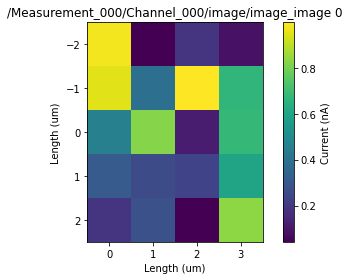

In [15]:
#Read it back
dr = pyNSID.NSIDReader('test2.hf5') #Read it back, into a sidpy dataset
dataset_sid = dr.read()[0]
dataset_sid.plot()

# 2. Loading a sidpy dataset from an SPM Image

We can directly load a sidpy dataset from a variety of different scanning probe vendor formats. One example is the IgorIBW file, which we will show here how to load. All of our 'readers' are in the package [**SciFiReaders**](https://github.com/pycroscopy/SciFiReaders) (Scientific File Readers) and it takes just one line to read data.

In [16]:
#Let's download the file
!wget https://www.dropbox.com/s/d5anfohtbwtc1z1/PTO_LAST0003.ibw?dl=1 -O PTO_file.ibw

--2021-10-04 15:53:03--  https://www.dropbox.com/s/d5anfohtbwtc1z1/PTO_LAST0003.ibw?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/d5anfohtbwtc1z1/PTO_LAST0003.ibw [following]
--2021-10-04 15:53:03--  https://www.dropbox.com/s/dl/d5anfohtbwtc1z1/PTO_LAST0003.ibw
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2a8928d995c19077c5b7aa7a8a.dl.dropboxusercontent.com/cd/0/get/BXamRDIh51VyTrv34O6V-vqLaTXJRk1cB9D-d1rPdwh85EAeOHbnDKfVNjpnXM2Rlrta30AYzins1s8rhpifC-shnJNF0WnZLBLT7q9jOAH0Gjd47N4Prbczs_ELUHcD2hslZ2HdNpsTLddeLJialCTl/file?dl=1# [following]
--2021-10-04 15:53:04--  https://uc2a8928d995c19077c5b7aa7a8a.dl.dropboxusercontent.com/cd/0/get/BXamRDIh51VyTrv34O6V-vqLaTXJRk1cB9D-d1rPdwh85EAeOHbnDKfVNjpnXM2Rlrta30AYzins

In [17]:
#Let's import the reader
from SciFiReaders import IgorIBWReader
reader = IgorIBWReader('PTO_file.ibw')
data_mat = reader.read()

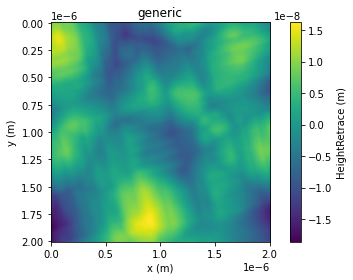

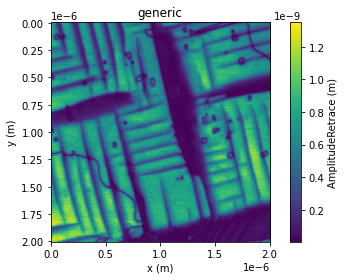

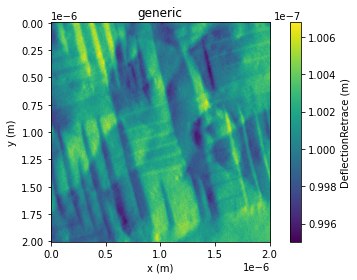

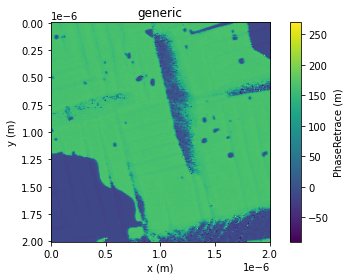

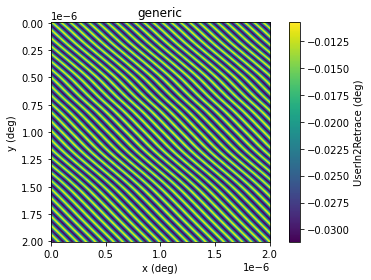

In [18]:
for ind in range(len(data_mat)): data_mat[ind].plot()

In [19]:
# Let's do some analysis. For this we will load an experimental release of pycroscopy
# One thing that is often useful to do is 'Image Windowing' - generate patches from images
# This can be useful for training models, for image cleaning, segmentation etc.
# Pycroscopy has a feature for this that is easy to use

#import the package
import pycroscopy as px
from pycroscopy.image import ImageWindowing

amp_image = data_mat[1] #Work on the amplitude image

#Do some sliding FFT
parms_dict = {}

#Window parameters
parms_dict['window_step_x'] = 32
parms_dict['window_step_y'] = 32
parms_dict['window_size_x'] = 128
parms_dict['window_size_y'] = 128

#Mode parameters
parms_dict['mode'] = 'image'
parms_dict['fft_mode'] = 'abs'
parms_dict['interpol_factor'] = 2.3 
parms_dict['zoom_factor'] = 2 #NOTE: Must be integer

iw2 = ImageWindowing(parms_dict)
windows = iw2.MakeWindows(amp_image)

image test is shape (128, 128)
image zoomed is shape (64, 64)
image zoomed interpol is shape (147, 147)


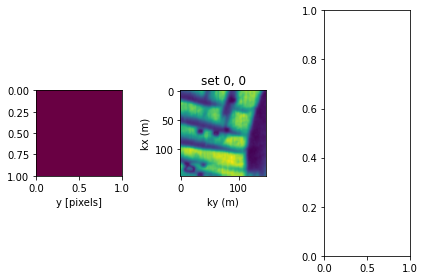

In [20]:
windows.plot()

In [21]:
windows.metadata

{'ADCgain': 0,
 'ARCZ': 1,
 'ARSysScanBusy': 0,
 'ARUserPanelName': '',
 'ATC Case Temp': 23.228,
 'ATC Exit Temp': 37.056,
 'ATC Fan PWM': 100,
 'ATC Heater Case Temp': 31.668,
 'ATC Heater PWM': 26.491,
 'ATC Temp0': 4.9438,
 'ATC Temp1': 22.731,
 'AdjustSpringConstant': 1,
 'Amp2Invols': 2e-08,
 'AmpInvOLS': 1.09e-07,
 'Amplitude': '$Lockin.0.r',
 'Amplitude1': '$Lockin.1.r',
 'AmplitudeSetpointMeters': 1e-08,
 'AmplitudeSetpointVolts': 0.8,
 'AppendThermalBit': 8,
 'AutoNapZGain': 1,
 'AutoTuneHigh': 400000,
 'AutoTuneHigh1': 2000000,
 'AutoTuneLimit': 0,
 'AutoTuneLow': 50000,
 'AutoTuneLow1': 1500000,
 'BNCOut0': '$DDSDCOffset0',
 'BNCOut1': 'Ground',
 'BNCOut2': 'ACDefl',
 'BackPackIn0Ab': '',
 'BackPackIn0Force': '',
 'BackPackIn0Gain': 1,
 'BackPackIn0Name': '',
 'BackPackIn0Offset': 0,
 'BackPackIn0Unit': 'V',
 'BackPackIn1Ab': '',
 'BackPackIn1Force': '',
 'BackPackIn1Gain': 1,
 'BackPackIn1Name': '',
 'BackPackIn1Offset': 0,
 'BackPackIn1Unit': 'V',
 'BackPackIn2Ab': '',
 '

# 4.   Some suggested packages to try next:

There are a host of packages in the px ecosystem that are for more specific domain areas. Our main SPM package is geared towards analysis of band-excitation and G-mode piezoresponse force microscopy datasets, and is termed 'BGlib'. pyTEMLIb is suitable for simulating and analysis of TEM images. AtomAI trains and exploits deep learning models to analyze atomically resolve images.

- [pyTEMLib](https://github.com/pycroscopy/pyTEMlib)
- [AtomAI](https://github.com/pycroscopy/atomai) 
- [BGlib](https://github.com/pycroscopy/BGlib)

In [22]:
windows

sidpy.Dataset of type IMAGE_4D with:
 dask.array<array, shape=(1, 1, 147, 147), dtype=float64, chunksize=(1, 1, 147, 147), chunktype=numpy.ndarray>
 data contains: AmplitudeRetrace (m)
 and Dimensions: 
x:  x (m) of size (1,)
y:  y (m) of size (1,)
WindowX:  kx (m) of size (147,)
WindowY:  ky (m) of size (147,)
 with metadata: ['ScanSize', 'FastScanSize', 'SlowScanSize', 'ScanRate', 'XOffset', 'YOffset', 'PointsLines', 'ScanPoints', 'ScanLines', 'ScanAngle', 'ImagingMode', 'InvOLS', 'SpringConstant', 'AmpInvOLS', 'Amp2Invols', 'FastRatio', 'SlowRatio', 'TopLine', 'BottomLine', 'ScanMode', 'NapMode', 'FMapScanTime', 'FMapScanPoints', 'FMapScanLines', 'FMapXYVelocity', 'FMapBookWise', 'Channel1DataType', 'DataTypeSum', 'PhaseOffset', 'PhaseOffset1', 'NapPhaseOffset', 'VoltageParm', 'NapParms', 'PreScanSetting', 'OrcaOffset', 'OrcaOffset2', 'UserIn0Gain', 'UserIn0Offset', 'UserIn1Gain', 'UserIn1Offset', 'UserIn2Gain', 'UserIn2Offset', 'LateralGain', 'LateralOffset', 'OrcaGain', 'OrcaGain2', 'FastMapScanRate', 'FastMapZRate', 'BackPackIn0Offset', 'BackPackIn0Gain', 'BackPackIn1Offset', 'BackPackIn1Gain', 'BackPackIn2Offset', 'BackPackIn2Gain', 'BackPackIn3Offset', 'BackPackIn3Gain', 'BackPackIn4Offset', 'BackPackIn4Gain', 'Real Parms', 'Initial Parms', 'Initial ScanSize', 'Initial FastScanSize', 'Initial SlowScanSize', 'Initial ScanRate', 'ScanSpeed', 'Initial XOffset', 'Initial YOffset', 'Initial ScanPoints', 'Initial ScanLines', 'RoundFactor', 'IntegralGain', 'ProportionalGain', 'Initial ScanAngle', 'ScanAngleFactor', 'AmplitudeSetpointVolts', 'AmplitudeSetpointMeters', 'DriveAmplitude', 'DriveFrequency', 'SweepWidth', 'SlowScanEnabled', 'DeflectionSetpointVolts', 'DeflectionSetpointMeters', 'DeflectionSetpointNewtons', 'Initial ImagingMode', 'MaxScanSize', 'Initial InvOLS', 'Initial SpringConstant', 'DisplaySpringConstant', 'ScanStateChanged', 'ScanDown', 'XLVDTSens', 'YLVDTSens', 'ZLVDTSens', 'XLVDTOffset', 'YLVDTOffset', 'ZLVDTOffset', 'YIgain', 'YPgain', 'XIgain', 'XPgain', 'LastScan', 'XPiezoSens', 'YPiezoSens', 'ZPiezoSens', 'XDriveOffset', 'YDriveOffset', 'SweepPoints', 'SecretGain', 'YSgain', 'XSgain', 'DIsplayLVDTTraces', 'Initial PhaseOffset', 'BaseSuffix', 'SaveImage', 'ParmChange', 'ADCgain', 'OldADCgain', 'OldScanSize', 'OldYOffset', 'OldXOffset', 'ZIgain', 'ZPgain', 'ZSgain', 'Initial AmpInvOLS', 'UpdateCounter', 'DoMunge', 'XMungeAlpha', 'YMungeAlpha', 'ZMungeAlpha', 'Has1xACDeflGain', 'DontChangeXPT', 'LowNoise', 'ScreenRatio', 'XDriftRate', 'YDriftRate', 'XDriftTotal', 'YDriftTotal', 'DriftBIts', 'DriftCount', 'Setpoint', 'Initial FastRatio', 'Initial SlowRatio', 'Initial TopLine', 'Initial BottomLine', 'ScanStatus', 'Is1DPlus', 'DelayUpdate', 'MarkerRatio', 'StartLineCount', 'OldAmplitudeSetpointVolts', 'OldDeflectionSetPointVolts', 'Initial ScanMode', 'Interpolate', 'TipVoltage', 'SurfaceVoltage', 'FreqIgain', 'FreqPgain', 'FreqSgain', 'Initial OrcaGain', 'FreqGainOn', 'Initial UserIn0Gain', 'Initial UserIn1Gain', 'Initial UserIn2Gain', 'Initial LateralGain', 'IsBipolar', 'FrequencyHack', 'MagneticField', 'DriveGainOn', 'DriveIGain', 'DrivePGain', 'DriveSGain', 'Initial UserIn0Offset', 'Initial UserIn1Offset', 'Initial UserIn2Offset', 'Initial LateralOffset', 'LastImage', 'ZoomSize', 'ZoomXOffset', 'ZoomYOffset', 'User0Voltage', 'User1Voltage', 'ExtendedZ', 'DriveAmplitude1', 'DriveFrequency1', 'SweepWidth1', 'Initial PhaseOffset1', 'Initial Amp2InvOLS', 'Initial VoltageParm', 'MicroscopeID', 'CapacitanceSens', 'CapacitanceOffset', 'CapPhaseOffset', 'TipBiasOffset', 'TipHeaterOffset', 'SurfaceBiasOffset', 'UseCantHolder', 'CurrentCantHolder', 'HasClickRing', 'XScanDirection', 'YScanDirection', 'SaveImageCount', 'SaveImageLines', 'Initial OrcaGain2', 'UpdateSlowWave', 'FBFilterBW', 'CurrentSetpointAmps', 'CurrentSetpointVolts', 'OldCurrentSetpointVolts', 'OldCurrentSetpointAmps', 'HasFM', 'LastScanWithdraw', 'HasLaserRelay', 'ToggleLaserRelay', 'Decimation', 'DARTIGain', 'DARTPGain', 'SampleHolder', 'ManualSamp